In [2]:
import pandas as pd
import numpy as np 
import os 

Need to read in the AP exam data all of it 
Then we need to merge it with the other finance data file 
remove the extra keys 
create an indicator column 
make a correlation matrix 

We are trying to conclude whether or not our data has an inherent bias towards schools that are in poverty and schools that are not 

In [62]:
os.chdir('/Users/meera/Documents/AP-Exams/Data')
os.getcwd()

'/Users/meera/Documents/AP-Exams/Data'

In [63]:
ap_ = pd.read_csv('AP_Directory.csv')
ap_ = ap_.iloc[:,1:]
ap_ = ap_[(ap_['race'] == 99) &
          (ap_['sex'] == 99)]

In [64]:
ap_.columns
ap_ = ap_.drop(['race', 'sex', 'leaid_y', 'lea_name',
       'street_location', 'city_location', 'state_location', 'zip_location',
       'latitude', 'longitude', 'urban_centric_locale', 'county_code',
       'school_level', 'school_type', 'school_status', 'lowest_grade_offered',
       'highest_grade_offered', 'bureau_indian_education', 'title_i_status',
       'title_i_eligible', 'title_i_schoolwide', 'charter', 'magnet',
       'teachers_fte', 'free_lunch', 'reduced_price_lunch',
       'free_or_reduced_price_lunch', 'elem_cedp', 'high_cedp', 'middle_cedp',
       'ungrade_cedp'], axis = 1)

In [65]:
ap_.columns

Index(['ncessch', 'year', 'leaid_x', 'students_AP_exam_none',
       'students_AP_pass_none', 'students_AP_exam_oneormore',
       'students_AP_pass_oneormore', 'school_name', 'enrollment'],
      dtype='object')

In [66]:
#making an indicator column to say if they took the exam or not 
ap_['AP_oneormore_Present'] = (~ap_['students_AP_exam_oneormore'].isnull()).astype(int) 

In [67]:
#now merge it with the finance data 
os.chdir('/Users/meera/Documents/AP-Exams/AP_school_data')
os.getcwd()

'/Users/meera/Documents/AP-Exams/AP_school_data'

In [68]:
staff = pd.read_csv('staff_all.csv')
finance = pd.read_csv('finance_all.csv')

<ipython-input-68-6f7527ef3a18>:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  staff = pd.read_csv('staff_all.csv')


In [69]:
#making the staff and finance ncessch a floatie boy 
staff = staff[staff['ncessch'] != "06CC14100001"] 
staff = staff.iloc[:,1:]
cols = ['ncessch']
staff[cols] = staff[cols].apply(pd.to_numeric, axis=1)

#drop certain columns also 
staff = staff.drop(['leaid', 'teachers_certified_fte',
                   'teachers_uncertified_fte',
                   'teachers_first_year_fte', 'teachers_second_year_fte',
                   'teachers_current_sy', 'teachers_previous_sy'], axis =1)


In [70]:
staff

,crdc_id,year,ncessch,teachers_fte_crdc,teachers_absent_fte,counselors_fte,psychologists_fte,social_workers_fte,nurses_fte,security_guard_fte,law_enforcement_fte,law_enforcement_ind
0,040032402160,2011,4.003240e+10,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,040032402265,2011,4.003240e+10,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,060000103278,2011,6.000010e+10,20.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,060000106294,2011,6.000011e+10,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,060000107534,2011,6.000011e+10,16.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
40003,06CC51800001,2017,6.128801e+10,22.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
40004,06CC51900001,2017,6.910261e+10,12.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0
40005,06CC52000001,2017,6.083701e+10,21.0,2.8,2.0,0.4,0.0,0.2,0.0,0.0,0.0
40006,06CC52199999,2017,6.057301e+10,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
finance = finance[finance['ncessch'] != "06CC14100001"] 
finance = finance.iloc[:,1:]
cols = ['ncessch']
finance[cols] = finance[cols].apply(pd.to_numeric, axis=1)

In [72]:
finance

,crdc_id,year,ncessch,leaid,salaries_teachers,salaries_total,salaries_instruc_staff,salaries_instructional_aides,salaries_support,salaries_administration,expenditures_nonpersonnel,instructional_aides_fte,support_fte,administration_fte
0,040032402160,2011,4.003240e+10,0400324,309837.0,650997.000,472678.0,NaN,NaN,NaN,819492.0,NaN,NaN,NaN
1,040032402265,2011,4.003240e+10,0400324,278922.0,460968.000,321338.0,NaN,NaN,NaN,465507.0,NaN,NaN,NaN
2,060000103278,2011,6.000010e+10,0600001,1552253.0,1552253.000,749092.0,NaN,NaN,NaN,488255.0,NaN,NaN,NaN
3,060000106294,2011,6.000011e+10,0600001,569144.0,569144.000,322437.0,NaN,NaN,NaN,210135.0,NaN,NaN,NaN
4,060000107534,2011,6.000011e+10,0600001,954089.0,954089.000,476020.0,NaN,NaN,NaN,488255.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40003,06CC51800001,2017,6.128801e+10,0612880,1002888.0,2025140.000,NaN,230195.0,313942.0,478115.0,609294.0,10.00,8.5,3.00
40004,06CC51900001,2017,6.910261e+10,0691026,746334.0,906414.000,NaN,10800.0,52280.0,97000.0,210740.0,1.05,1.0,1.00
40005,06CC52000001,2017,6.083701e+10,0608370,1332288.0,1967267.000,NaN,35021.0,99760.0,500198.0,335318.0,1.39,2.0,8.15
40006,06CC52199999,2017,6.057301e+10,0605730,290476.0,290476.156,NaN,NaN,NaN,NaN,554227.0,0.00,0.0,0.00


In [73]:
ap_finance = pd.merge(ap_, finance, how = "left", on=["ncessch", "year"])

In [74]:
ap_finance.columns

Index(['ncessch', 'year', 'leaid_x', 'students_AP_exam_none',
       'students_AP_pass_none', 'students_AP_exam_oneormore',
       'students_AP_pass_oneormore', 'school_name', 'enrollment',
       'AP_oneormore_Present', 'crdc_id', 'leaid', 'salaries_teachers',
       'salaries_total', 'salaries_instruc_staff',
       'salaries_instructional_aides', 'salaries_support',
       'salaries_administration', 'expenditures_nonpersonnel',
       'instructional_aides_fte', 'support_fte', 'administration_fte'],
      dtype='object')

In [76]:
#get rid of duplicate keys 
key_counts = ap_finance.groupby(['ncessch', 'year']).size().reset_index().rename(columns={0:'count'})
key_counts[key_counts['count'] > 1]

,ncessch,year,count
2872,6.017101e+10,2013,4
5026,6.052801e+10,2017,4
5848,6.068101e+10,2011,4
6287,6.074401e+10,2013,4
9695,6.118201e+10,2013,4
10554,6.128801e+10,2013,4
10611,6.129101e+10,2013,4
13789,6.167401e+10,2013,4
14715,6.194401e+10,2017,4
15708,6.212100e+10,2011,4


In [77]:
ap_finance = ap_finance.groupby(['ncessch', 'year']).max().reset_index()

In [78]:
ap_finance

,ncessch,year,leaid_x,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,school_name,enrollment,AP_oneormore_Present,...,salaries_teachers,salaries_total,salaries_instruc_staff,salaries_instructional_aides,salaries_support,salaries_administration,expenditures_nonpersonnel,instructional_aides_fte,support_fte,administration_fte
0,4.003240e+10,2011,400324.0,NaN,NaN,NaN,NaN,NaN,NaN,0,...,309837.0,650997.00,472678.0,NaN,NaN,NaN,819492.0,NaN,NaN,NaN
1,4.003240e+10,2011,400324.0,NaN,NaN,NaN,NaN,NaN,NaN,0,...,278922.0,460968.00,321338.0,NaN,NaN,NaN,465507.0,NaN,NaN,NaN
2,6.000010e+10,2011,600001.0,89.0,8.0,42.0,26.0,VASQUEZ HIGH,513.0,1,...,1552253.0,1552253.00,749092.0,NaN,NaN,NaN,488255.0,NaN,NaN,NaN
3,6.000010e+10,2013,600001.0,0.0,NaN,0.0,NaN,VASQUEZ HIGH,436.0,1,...,1666368.0,2353412.93,1841882.0,NaN,NaN,NaN,641499.0,NaN,NaN,NaN
4,6.000010e+10,2015,600001.0,9.0,21.0,32.0,22.0,Vasquez High,399.0,1,...,221200.0,221200.00,NaN,21658.700,66071.200,100808.200,1473850.0,7.00,2.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39076,6.911371e+10,2011,691137.0,NaN,NaN,NaN,NaN,TENAYA ELEMENTARY,256.0,0,...,1015347.0,1347802.00,1130033.0,NaN,NaN,NaN,448454.0,NaN,NaN,NaN
39077,6.911371e+10,2013,691137.0,NaN,NaN,NaN,NaN,TENAYA ELEMENTARY,234.0,0,...,791561.0,1125859.38,843140.0,NaN,NaN,NaN,132006.0,NaN,NaN,NaN
39078,6.911371e+10,2015,691137.0,NaN,NaN,NaN,NaN,Tenaya Elementary,210.0,0,...,810414.0,1262181.88,NaN,64465.000,266072.000,121229.560,325012.0,2.65,5.28,1.0
39079,6.911371e+10,2017,691137.0,NaN,NaN,NaN,NaN,Tenaya Elementary,197.0,0,...,923676.0,1528007.00,NaN,167099.344,227423.188,209807.797,328116.0,5.63,2.41,3.0


In [79]:
#merging with the staff dataframe too now 
ap_finance_staff = pd.merge(ap_finance, staff, how = "left", on=["ncessch", "year"])
ap_finance_staff = ap_finance_staff.groupby(['ncessch', 'year']).max().reset_index()
ap_finance_staff

,ncessch,year,leaid_x,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,school_name,enrollment,AP_oneormore_Present,...,crdc_id_y,teachers_fte_crdc,teachers_absent_fte,counselors_fte,psychologists_fte,social_workers_fte,nurses_fte,security_guard_fte,law_enforcement_fte,law_enforcement_ind
0,4.003240e+10,2011,400324.0,NaN,NaN,NaN,NaN,NaN,NaN,0,...,040032402160,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4.003240e+10,2011,400324.0,NaN,NaN,NaN,NaN,NaN,NaN,0,...,040032402265,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,6.000010e+10,2011,600001.0,89.0,8.0,42.0,26.0,VASQUEZ HIGH,513.0,1,...,060000103278,20.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,6.000010e+10,2013,600001.0,0.0,NaN,0.0,NaN,VASQUEZ HIGH,436.0,1,...,060000103278,22.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0
4,6.000010e+10,2015,600001.0,9.0,21.0,32.0,22.0,Vasquez High,399.0,1,...,060000103278,19.0,1.0,1.0,0.00,0.0,0.0,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39076,6.911371e+10,2011,691137.0,NaN,NaN,NaN,NaN,TENAYA ELEMENTARY,256.0,0,...,069113710341,15.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39077,6.911371e+10,2013,691137.0,NaN,NaN,NaN,NaN,TENAYA ELEMENTARY,234.0,0,...,069113710341,13.0,1.2,0.0,NaN,NaN,NaN,NaN,NaN,0.0
39078,6.911371e+10,2015,691137.0,NaN,NaN,NaN,NaN,Tenaya Elementary,210.0,0,...,069113710341,14.0,2.0,0.0,0.38,0.4,0.0,0.0,NaN,0.0
39079,6.911371e+10,2017,691137.0,NaN,NaN,NaN,NaN,Tenaya Elementary,197.0,0,...,069113710341,14.0,5.0,0.0,0.15,0.5,0.0,0.0,0.0,0.0


In [80]:
#checking to see if there are duplicate keys still 
key_counts = ap_finance_staff.groupby(['ncessch', 'year']).size().reset_index().rename(columns={0:'count'})
key_counts[key_counts['count'] > 1]

,ncessch,year,count


In [81]:
ap_finance_staff.columns

Index(['ncessch', 'year', 'leaid_x', 'students_AP_exam_none',
       'students_AP_pass_none', 'students_AP_exam_oneormore',
       'students_AP_pass_oneormore', 'school_name', 'enrollment',
       'AP_oneormore_Present', 'crdc_id_x', 'leaid', 'salaries_teachers',
       'salaries_total', 'salaries_instruc_staff',
       'salaries_instructional_aides', 'salaries_support',
       'salaries_administration', 'expenditures_nonpersonnel',
       'instructional_aides_fte', 'support_fte', 'administration_fte',
       'crdc_id_y', 'teachers_fte_crdc', 'teachers_absent_fte',
       'counselors_fte', 'psychologists_fte', 'social_workers_fte',
       'nurses_fte', 'security_guard_fte', 'law_enforcement_fte',
       'law_enforcement_ind'],
      dtype='object')

In [83]:
#make the correlation matrix for just 2017 because other things are missing 
bias_check = ap_finance_staff[ap_finance_staff['year'] == 2017]
bias_check = bias_check[bias_check['enrollment'].notna()]

In [84]:
bias_check.columns

Index(['ncessch', 'year', 'leaid_x', 'students_AP_exam_none',
       'students_AP_pass_none', 'students_AP_exam_oneormore',
       'students_AP_pass_oneormore', 'school_name', 'enrollment',
       'AP_oneormore_Present', 'crdc_id_x', 'leaid', 'salaries_teachers',
       'salaries_total', 'salaries_instruc_staff',
       'salaries_instructional_aides', 'salaries_support',
       'salaries_administration', 'expenditures_nonpersonnel',
       'instructional_aides_fte', 'support_fte', 'administration_fte',
       'crdc_id_y', 'teachers_fte_crdc', 'teachers_absent_fte',
       'counselors_fte', 'psychologists_fte', 'social_workers_fte',
       'nurses_fte', 'security_guard_fte', 'law_enforcement_fte',
       'law_enforcement_ind'],
      dtype='object')

In [86]:


divide = ['teachers_absent_fte',
       'counselors_fte', 'psychologists_fte', 'social_workers_fte',
       'nurses_fte', 'security_guard_fte', 'law_enforcement_fte',
       'law_enforcement_ind']

bias_check[divide] = bias_check[divide].div(bias_check['enrollment'].values, axis =0)

bias_check

,ncessch,year,leaid_x,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,school_name,enrollment,AP_oneormore_Present,...,crdc_id_y,teachers_fte_crdc,teachers_absent_fte,counselors_fte,psychologists_fte,social_workers_fte,nurses_fte,security_guard_fte,law_enforcement_fte,law_enforcement_ind
5,6.000010e+10,2017,600001.0,0.0,NaN,65.0,NaN,Vasquez High,372.0,1,...,060000103278,18.0,0.005376,0.005376,0.000914,0.000000,0.000914,0.002688,0.0,0.0
11,6.000011e+10,2017,600001.0,NaN,NaN,NaN,NaN,Meadowlark Elementary,430.0,0,...,060000107534,20.0,0.002326,0.002326,0.000767,0.000000,0.000767,0.000000,0.0,0.0
15,6.000011e+10,2017,600001.0,NaN,NaN,NaN,NaN,High Desert,278.0,0,...,060000109444,15.0,0.000000,0.003597,0.001187,0.000000,0.000899,0.000000,0.0,0.0
16,6.000011e+10,2017,600001.0,NaN,NaN,NaN,NaN,Assurance Learning Academy,2620.0,0,...,06CC40900001,156.0,0.000000,0.001947,0.000305,0.000000,0.000000,0.006107,0.0,0.0
17,6.000011e+10,2017,600001.0,NaN,NaN,NaN,NaN,Inspire Charter,3019.0,0,...,06CC13800001,140.0,0.000000,0.000464,0.001699,0.000000,0.000374,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39063,6.911361e+10,2017,691136.0,NaN,NaN,NaN,NaN,Aromas,409.0,0,...,069113610298,18.0,0.011002,0.000807,0.000807,0.000000,0.000000,0.000000,0.0,0.0
39067,6.911371e+10,2017,691137.0,NaN,NaN,NaN,NaN,Moccasin Community Day,4.0,0,...,069113707914,1.0,0.000000,0.000000,0.000000,0.037500,0.000000,0.000000,0.0,0.0
39071,6.911371e+10,2017,691137.0,0.0,NaN,2.0,NaN,Tioga High,45.0,1,...,069113710339,4.0,0.000000,0.002667,0.002667,0.005556,0.000000,0.000000,0.0,0.0
39075,6.911371e+10,2017,691137.0,NaN,NaN,NaN,NaN,Don Pedro High,41.0,0,...,069113710340,4.0,0.073171,0.000000,0.000000,0.004878,0.000000,0.000000,0.0,0.0


In [87]:
#divide the salaries by the total teacher

divide = ['salaries_teachers']

bias_check[divide] = bias_check[divide].div(bias_check['teachers_fte_crdc'].values, axis =0)
bias_check

,ncessch,year,leaid_x,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,school_name,enrollment,AP_oneormore_Present,...,crdc_id_y,teachers_fte_crdc,teachers_absent_fte,counselors_fte,psychologists_fte,social_workers_fte,nurses_fte,security_guard_fte,law_enforcement_fte,law_enforcement_ind
5,6.000010e+10,2017,600001.0,0.0,NaN,65.0,NaN,Vasquez High,372.0,1,...,060000103278,18.0,0.005376,0.005376,0.000914,0.000000,0.000914,0.002688,0.0,0.0
11,6.000011e+10,2017,600001.0,NaN,NaN,NaN,NaN,Meadowlark Elementary,430.0,0,...,060000107534,20.0,0.002326,0.002326,0.000767,0.000000,0.000767,0.000000,0.0,0.0
15,6.000011e+10,2017,600001.0,NaN,NaN,NaN,NaN,High Desert,278.0,0,...,060000109444,15.0,0.000000,0.003597,0.001187,0.000000,0.000899,0.000000,0.0,0.0
16,6.000011e+10,2017,600001.0,NaN,NaN,NaN,NaN,Assurance Learning Academy,2620.0,0,...,06CC40900001,156.0,0.000000,0.001947,0.000305,0.000000,0.000000,0.006107,0.0,0.0
17,6.000011e+10,2017,600001.0,NaN,NaN,NaN,NaN,Inspire Charter,3019.0,0,...,06CC13800001,140.0,0.000000,0.000464,0.001699,0.000000,0.000374,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39063,6.911361e+10,2017,691136.0,NaN,NaN,NaN,NaN,Aromas,409.0,0,...,069113610298,18.0,0.011002,0.000807,0.000807,0.000000,0.000000,0.000000,0.0,0.0
39067,6.911371e+10,2017,691137.0,NaN,NaN,NaN,NaN,Moccasin Community Day,4.0,0,...,069113707914,1.0,0.000000,0.000000,0.000000,0.037500,0.000000,0.000000,0.0,0.0
39071,6.911371e+10,2017,691137.0,0.0,NaN,2.0,NaN,Tioga High,45.0,1,...,069113710339,4.0,0.000000,0.002667,0.002667,0.005556,0.000000,0.000000,0.0,0.0
39075,6.911371e+10,2017,691137.0,NaN,NaN,NaN,NaN,Don Pedro High,41.0,0,...,069113710340,4.0,0.073171,0.000000,0.000000,0.004878,0.000000,0.000000,0.0,0.0


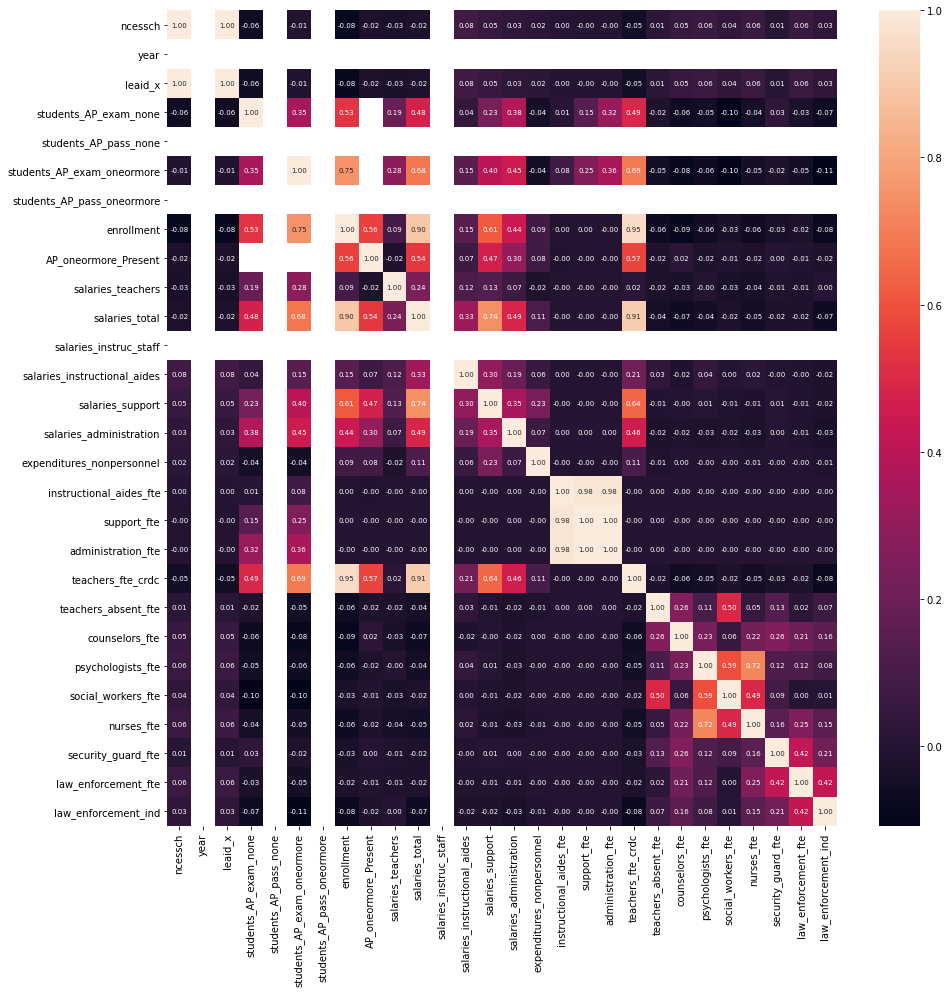

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
correlation = bias_check.corr()
sns.heatmap(correlation, annot = True, ax = ax,
           annot_kws={"fontsize":7}, fmt ='.2f')
plt.show()

It shows that there is a correlation of roughly 0.54 between the total salary that is at the school and whether or not that speciic school reported their AP Exam scores. This is important to note because this could indicate that there is a potential bias in our data because schools that reported their scores tend to have a large total salary for the school. 